In [1]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Create a virtual environment
!python -m venv venv

# Activate the virtual environment
# On Windows
!venv\Scripts\activate


In [5]:
pip install -U ultralytics


  Using cached ultralytics-8.2.99-py3-none-any.whl.metadata (39 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached ultralytics_thop-2.0.8-py3-none-any.whl.metadata (9.3 kB)
Using cached ultralytics-8.2.99-py3-none-any.whl (874 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached ultralytics_thop-2.0.8-py3-none-any.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\User1\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [8]:
!pip install -U ultralytics

In [1]:
import torch

# Check if YOLOv5 is installed correctly
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # Load a pretrained model
print(model)  # Print the model structure


Using cache found in C:\Users\User1/.cache\torch\hub\ultralytics_yolov5_master


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\User1\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.2', 'tqdm>=4.66.3', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...
   ---------------------------------------- 2.6/2.6 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 1.2/1.2 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.0.0
    Uninstalling setuptools-68.0.0:
      Successfully uninstalled setuptools-68.0.0
  Attempting uninstall: reques

YOLOv5  2024-9-23 Python-3.11.5 torch-2.4.1+cpu CPU

100%|██████████| 14.1M/14.1M [00:04<00:00, 3.44MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Constants
save_dir = r'C:\Users\User1\Downloads\imagedata'
train_dir = os.path.join(save_dir, 'images', 'train')
val_dir = os.path.join(save_dir, 'images', 'val')
label_train_dir = os.path.join(save_dir, 'labels', 'train')
label_val_dir = os.path.join(save_dir, 'labels', 'val')

# Categories
categories = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 
              'train', 'truck', 'boat', 'bird', 'cat', 'dog', 'horse', 
              'sheep', 'cow']

# Create directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(label_train_dir, exist_ok=True)
os.makedirs(label_val_dir, exist_ok=True)

# Loop through each category
for category in categories:
    # Create category folders
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

    # Find images and labels
    images = []
    labels = []
    
    for filename in os.listdir(save_dir):
        if filename.endswith('.jpg') and category in filename:
            images.append(filename)
            labels.append(filename.replace('.jpg', '.txt'))

    # Split into train and validation sets (80% train, 20% validation)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Move training images and labels
    for img in train_images:
        shutil.move(os.path.join(save_dir, img), os.path.join(train_dir, img))
        shutil.move(os.path.join(save_dir, img.replace('.jpg', '.txt')), 
                    os.path.join(label_train_dir, img.replace('.jpg', '.txt')))

    # Move validation images and labels
    for img in val_images:
        shutil.move(os.path.join(save_dir, img), os.path.join(val_dir, img))
        shutil.move(os.path.join(save_dir, img.replace('.jpg', '.txt')), 
                    os.path.join(label_val_dir, img.replace('.jpg', '.txt')))

print("Dataset organized successfully.")



Dataset organized successfully.


Dataset Folder Structure:
imagedata/
  images/
    train/
      airplane/
      bicycle/
      bird/
      boat/
      bus/
      car/
      cat/
      cow/
      dog/
      horse/
      motorcycle/
      person/
      sheep/
      train/
      truck/
    val/
      airplane/
      bicycle/
      bird/
      boat/
      bus/
      car/
      cat/
      cow/
      dog/
      horse/
      motorcycle/
      person/
      sheep/
      train/
      truck/
  labels/
    train/
    val/

Sample Images from Training Set:


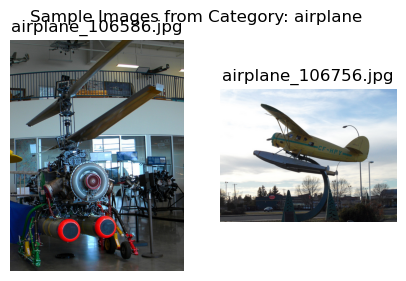

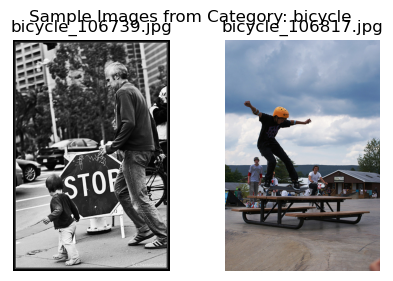

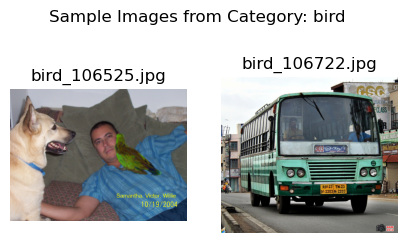

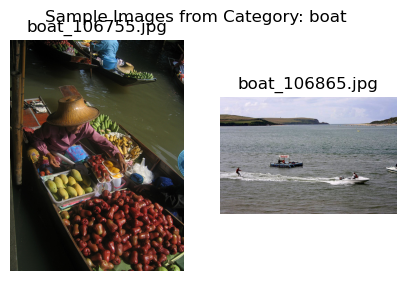

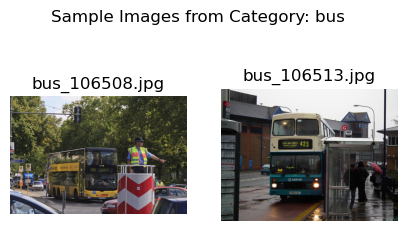

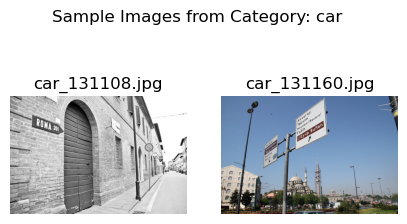

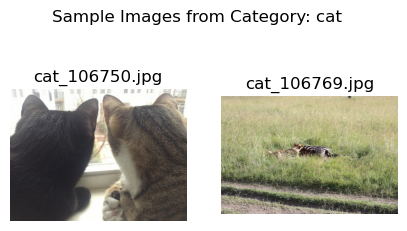

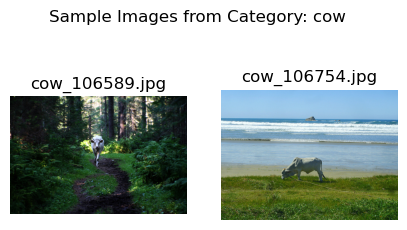

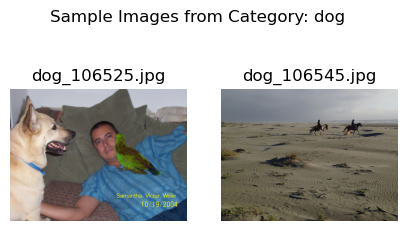

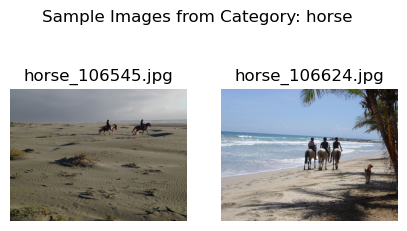

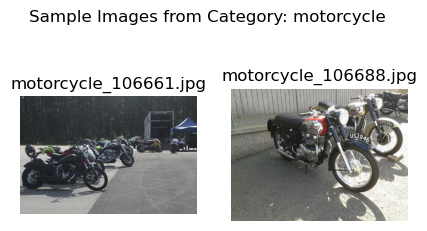

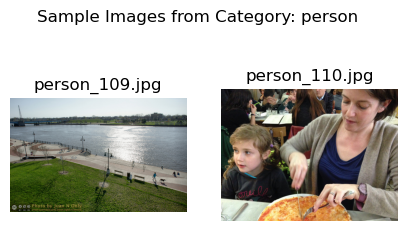

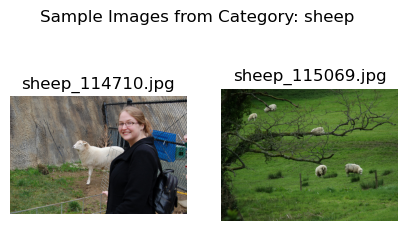

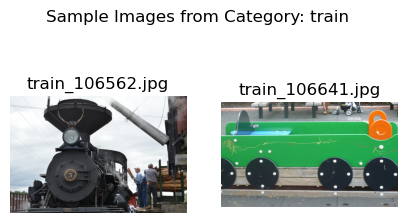

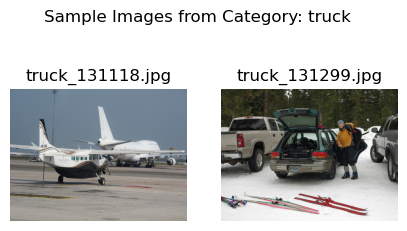


Sample Images from Validation Set:


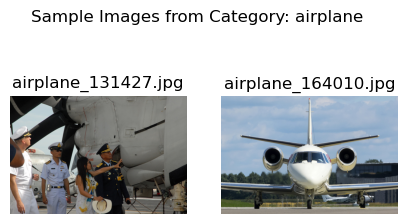

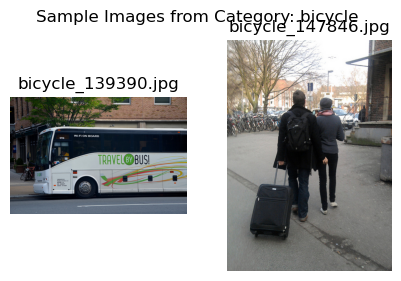

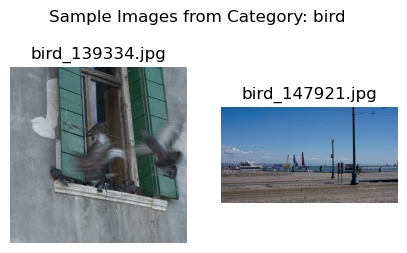

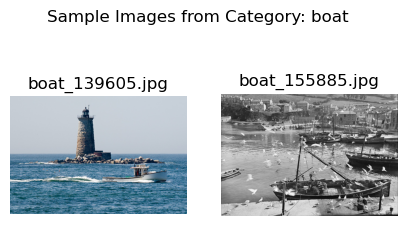

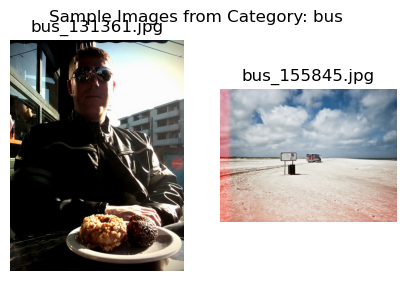

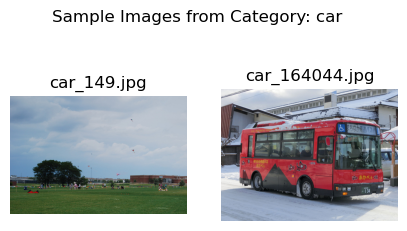

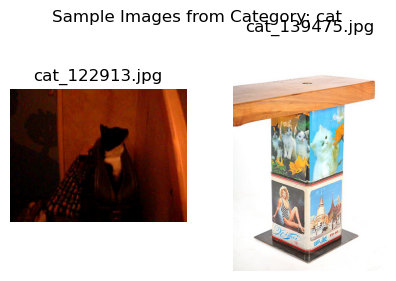

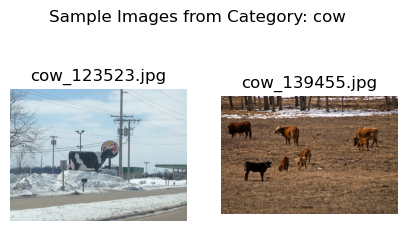

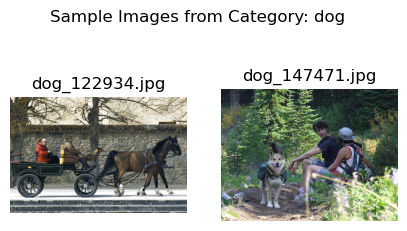

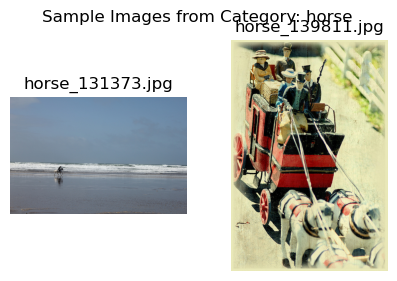

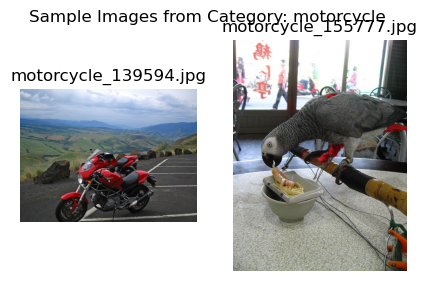

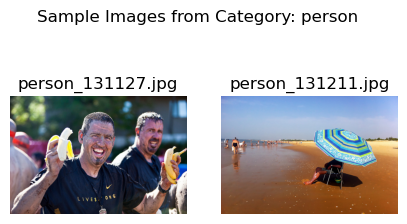

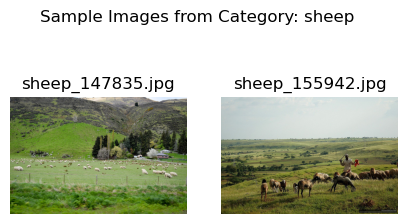

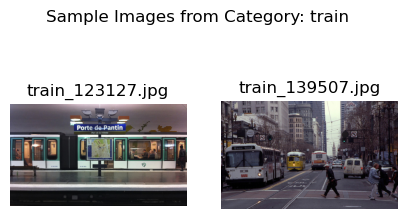

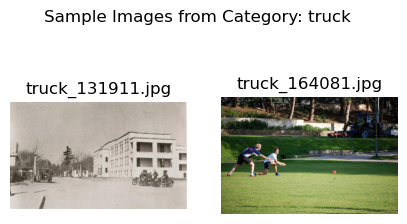

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Constants
save_dir = r'C:\Users\User1\Downloads\imagedata'
train_dir = os.path.join(save_dir, 'images', 'train')
val_dir = os.path.join(save_dir, 'images', 'val')

# Function to print folder structure
def print_folder_structure(path, level=0):
    if os.path.isdir(path):
        print('  ' * level + os.path.basename(path) + '/')
        for item in os.listdir(path):
            print_folder_structure(os.path.join(path, item), level + 1)

# Function to display sample images from each category
def display_sample_images(dir_path, num_samples=2):
    for category in os.listdir(dir_path):
        category_path = os.path.join(dir_path, category)
        if os.path.isdir(category_path):
            images = [img for img in os.listdir(category_path) if img.endswith('.jpg')]
            sample_images = images[:num_samples]  # Get a few sample images
            
            # Create a subplot for each category
            plt.figure(figsize=(5, 3))
            for i, img_name in enumerate(sample_images):
                img_path = os.path.join(category_path, img_name)
                img = Image.open(img_path)
                plt.subplot(1, num_samples, i + 1)
                plt.imshow(img)
                plt.axis('off')
                plt.title(img_name)
            plt.suptitle(f'Sample Images from Category: {category}')
            plt.show()

# Print folder structure
print("Dataset Folder Structure:")
print_folder_structure(save_dir)

# Display sample images from training and validation directories
print("\nSample Images from Training Set:")
display_sample_images(train_dir)

print("\nSample Images from Validation Set:")
display_sample_images(val_dir)


In [7]:
import os
from PIL import Image

# Constants
image_dir = r'C:\Users\User1\Downloads\imagedata\images'
train_dir = os.path.join(image_dir, 'train')
val_dir = os.path.join(image_dir, 'val')

# Function to resize images
def resize_images(dir_path, size=(640, 640)):
    for category in os.listdir(dir_path):
        category_path = os.path.join(dir_path, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                if img_name.endswith('.jpg'):
                    img_path = os.path.join(category_path, img_name)
                    try:
                        img = Image.open(img_path)
                        img = img.resize(size)
                        img.save(img_path)  # Save resized image
                    except Exception as e:
                        print(f"Error processing image {img_path}: {e}")

# Function to check for corrupted images
def check_image_integrity(dir_path):
    corrupted_images = []
    for category in os.listdir(dir_path):
        category_path = os.path.join(dir_path, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                if img_name.endswith('.jpg'):
                    img_path = os.path.join(category_path, img_name)
                    try:
                        img = Image.open(img_path)
                        img.verify()  # Check if image is intact
                    except (IOError, SyntaxError) as e:
                        corrupted_images.append(img_path)
                        print(f"Corrupted image found: {img_path}")

    return corrupted_images

# Resize images in training and validation datasets
print("Resizing training images...")
resize_images(train_dir)
print("Resizing validation images...")
resize_images(val_dir)

# Check image integrity
print("Checking image integrity for training set...")
corrupted_train_images = check_image_integrity(train_dir)
print("Checking image integrity for validation set...")
corrupted_val_images = check_image_integrity(val_dir)

# Report results
if corrupted_train_images:
    print("\nCorrupted images in training set:")
    for img in corrupted_train_images:
        print(img)
else:
    print("\nNo corrupted images in training set.")

if corrupted_val_images:
    print("\nCorrupted images in validation set:")
    for img in corrupted_val_images:
        print(img)
else:
    print("\nNo corrupted images in validation set.")

print("Preprocessing completed!")


Resizing training images...
Resizing validation images...
Checking image integrity for training set...
Checking image integrity for validation set...

No corrupted images in training set.

No corrupted images in validation set.
Preprocessing completed!


In [1]:
import os


data_yaml_content = """train: C:\\Users\\User1\\Downloads\\imagedata\\images\\train
val: C:\\Users\\User1\\Downloads\\imagedata\\images\\val

nc: 15 
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 
        'train', 'truck', 'boat', 'bird', 'cat', 'dog', 'horse', 
        'sheep', 'cow'] 
"""


yaml_file_path = os.path.join('C:\\Users\\User1\\Downloads\\imagedata', 'data.yaml')


with open(yaml_file_path, 'w') as file:
    file.write(data_yaml_content)

print(f"data.yaml has been created at: {yaml_file_path}")


data.yaml has been created at: C:\Users\User1\Downloads\imagedata\data.yaml


In [2]:
import torch

# Check if YOLOv5 is installed correctly
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # Load a pretrained model
print(model)  # Print the model structure

Using cache found in C:\Users\User1/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-23 Python-3.11.5 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [9]:
import os
import glob

# Specify the paths
train_cache_path = r"C:\Users\User1\Downloads\imagedata\labels\train\*.cache"
val_cache_path = r"C:\Users\User1\Downloads\imagedata\labels\val\*.cache"

# Delete train cache files
for cache_file in glob.glob(train_cache_path):
    os.remove(cache_file)

# Delete validation cache files
for cache_file in glob.glob(val_cache_path):
    os.remove(cache_file)

print("Cache files deleted.")


Cache files deleted.


In [3]:
import os

train_labels = os.listdir(r"C:\Users\User1\Downloads\imagedata\labels\train")
val_labels = os.listdir(r"C:\Users\User1\Downloads\imagedata\labels\val")

print("Train Labels:", train_labels)
print("Validation Labels:", val_labels)


Train Labels: ['airplane_106586.txt', 'airplane_106756.txt', 'airplane_114728.txt', 'airplane_115178.txt', 'airplane_122908.txt', 'airplane_123282.txt', 'airplane_131118.txt', 'airplane_131133.txt', 'airplane_131174.txt', 'airplane_147698.txt', 'airplane_147969.txt', 'airplane_147971.txt', 'airplane_155751.txt', 'airplane_156126.txt', 'airplane_16418.txt', 'airplane_164222.txt', 'airplane_16432.txt', 'airplane_16683.txt', 'airplane_16765.txt', 'airplane_16784.txt', 'airplane_16902.txt', 'airplane_172537.txt', 'airplane_180272.txt', 'airplane_180411.txt', 'airplane_180505.txt', 'airplane_188587.txt', 'airplane_188891.txt', 'airplane_188927.txt', 'airplane_196675.txt', 'airplane_196681.txt', 'airplane_196804.txt', 'airplane_196916.txt', 'airplane_197120.txt', 'airplane_204938.txt', 'airplane_205040.txt', 'airplane_205114.txt', 'airplane_205280.txt', 'airplane_213412.txt', 'airplane_221184.txt', 'airplane_221322.txt', 'airplane_221691.txt', 'airplane_229415.txt', 'airplane_229605.txt', 'a

In [2]:
import os

label_dir = r'C:\Users\User1\Downloads\imagedata\labels\train'

# Iterate through the label directory
for filename in os.listdir(label_dir):
    if not filename.endswith('.txt'):
        old_file = os.path.join(label_dir, filename)
        new_file = os.path.join(label_dir, filename + '.txt')
        os.rename(old_file, new_file)





        import os

val_label_dir = r'C:\Users\User1\Downloads\imagedata\labels\val'

# Iterate through the validation label directory
for filename in os.listdir(val_label_dir):
    if not filename.endswith('.txt'):
        old_file = os.path.join(val_label_dir, filename)
        new_file = os.path.join(val_label_dir, filename + '.txt')
        os.rename(old_file, new_file)



In [2]:
import torch
from torchvision import datasets, transforms

# Define paths
train_images_dir = r'C:\Users\User1\Downloads\imagedata\images\train'
val_images_dir = r'C:\Users\User1\Downloads\imagedata\images\val'

# Define image dimensions and batch size
image_height, image_width = 640, 640
batch_size = 16  # Adjust as needed

# Define normalization transform
transform = transforms.Compose([
    transforms.Resize((image_height, image_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Adjust mean and std as needed
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_images_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_images_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [7]:
import ultralytics
print(ultralytics.__version__)

8.2.100


In [1]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt') 

data_config = r'C:\Users\User1\Downloads\imagedata\data80.yaml'  
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
model.train(data=data_config,epochs=10)

Ultralytics YOLOv8.2.100  Python-3.11.5 torch-2.4.1+cpu CPU (Intel Core(TM) i3-7020U 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\User1\Downloads\imagedata\data80.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train34, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

train: Scanning C:\Users\User1\Downloads\imagedata\labels\train\airplane... 2240 images, 2400 backgrounds, 0 corrupt: 100%|██████████| 4640/4640 [00:16<00:00, 289.04it/s]


train: New cache created: C:\Users\User1\Downloads\imagedata\labels\train\airplane.cache


val: Scanning C:\Users\User1\Downloads\imagedata\labels\val\airplane.cache... 600 images, 640 backgrounds, 0 corrupt: 100%|██████████| 1240/1240 [00:00<?, ?it/s]


Plotting labels to runs\detect\train34\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000118, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train34
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.294      4.819      1.277         14        640: 100%|██████████| 290/290 [1:36:01<00:00, 19.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [10:50<00:00, 16.68s/it]


                   all       1240       4706      0.789     0.0614     0.0378     0.0264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G       1.36      3.846      1.322         57        640: 100%|██████████| 290/290 [1:32:58<00:00, 19.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [10:18<00:00, 15.86s/it]


                   all       1240       4706      0.764      0.103      0.064     0.0423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.361       3.45      1.318         53        640: 100%|██████████| 290/290 [1:30:14<00:00, 18.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [10:18<00:00, 15.86s/it]


                   all       1240       4706      0.634      0.124     0.0969     0.0698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.354      3.281      1.321         62        640: 100%|██████████| 290/290 [1:30:53<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [12:21<00:00, 19.01s/it]


                   all       1240       4706      0.511      0.175      0.118     0.0824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.336      3.169      1.299         36        640: 100%|██████████| 290/290 [1:37:04<00:00, 20.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [10:05<00:00, 15.52s/it]


                   all       1240       4706      0.487      0.196      0.138     0.0968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.317      3.055      1.293         39        640: 100%|██████████| 290/290 [1:26:12<00:00, 17.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [10:03<00:00, 15.46s/it]


                   all       1240       4706      0.484      0.195      0.143      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.306      2.947      1.282         52        640: 100%|██████████| 290/290 [1:26:26<00:00, 17.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [10:05<00:00, 15.53s/it]


                   all       1240       4706      0.433      0.219      0.155      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.296      2.889      1.277         52        640: 100%|██████████| 290/290 [1:26:53<00:00, 17.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [10:00<00:00, 15.40s/it]


                   all       1240       4706      0.417      0.224       0.15      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.267      2.875      1.259         55        640: 100%|██████████| 290/290 [1:26:28<00:00, 17.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [10:01<00:00, 15.43s/it]


                   all       1240       4706      0.448      0.224      0.152      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.264      2.843      1.257         32        640: 100%|██████████| 290/290 [1:26:39<00:00, 17.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [10:00<00:00, 15.40s/it]


                   all       1240       4706      0.461      0.233      0.164      0.118

10 epochs completed in 16.746 hours.
Optimizer stripped from runs\detect\train34\weights\last.pt, 6.6MB
Optimizer stripped from runs\detect\train34\weights\best.pt, 6.6MB

Validating runs\detect\train34\weights\best.pt...
Ultralytics YOLOv8.2.100  Python-3.11.5 torch-2.4.1+cpu CPU (Intel Core(TM) i3-7020U 2.30GHz)
Model summary (fused): 168 layers, 3,160,775 parameters, 0 gradients, 8.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [07:33<00:00, 11.62s/it]


                   all       1240       4706      0.464      0.234      0.152      0.107
                person        326       1558      0.378       0.47      0.287      0.171
               bicycle         62        167      0.243      0.269      0.151     0.0796
                   car        151        502      0.328      0.408       0.26       0.16
            motorcycle         65        115      0.467      0.174      0.255      0.154
              airplane         48         62       0.39      0.806      0.421      0.306
                   bus         71        110      0.327      0.709      0.318      0.248
                 train         47         56      0.376      0.679       0.35      0.257
                 truck         86        131        0.3      0.382       0.23      0.164
                  boat         57        228      0.241      0.399      0.191     0.0939
         traffic light         48        141       0.32      0.262      0.187      0.111
          fire hydran

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001B10F0BCA10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,   

In [10]:
import os

# Path to the folder
folder_path = r'C:\Users\User1\Downloads\imagedata\images\val'

# Check if the folder exists
if os.path.exists(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    print(f"Folder exists. Total files: {len(files)}")
    print("Files:", files)
else:
    print("Folder does not exist.")


Folder exists. Total files: 616
Files: ['airplane', 'airplane_131427.jpg', 'airplane_164010.jpg', 'airplane_164041.jpg', 'airplane_164205.jpg', 'airplane_188749.jpg', 'airplane_221532.jpg', 'airplane_237988.jpg', 'airplane_24585.jpg', 'airplane_246181.jpg', 'airplane_254104.jpg', 'airplane_254242.jpg', 'airplane_254347.jpg', 'airplane_262148.jpg', 'airplane_262187.jpg', 'airplane_278760.jpg', 'airplane_278790.jpg', 'airplane_279009.jpg', 'airplane_295076.jpg', 'airplane_303376.jpg', 'airplane_311776.jpg', 'airplane_319990.jpg', 'airplane_344397.jpg', 'airplane_368978.jpg', 'airplane_393410.jpg', 'airplane_393656.jpg', 'airplane_409767.jpg', 'airplane_417822.jpg', 'airplane_426118.jpg', 'airplane_434381.jpg', 'airplane_483547.jpg', 'airplane_483767.jpg', 'airplane_49549.jpg', 'airplane_524763.jpg', 'airplane_540816.jpg', 'airplane_548933.jpg', 'airplane_565648.jpg', 'airplane_573854.jpg', 'airplane_581770.jpg', 'airplane_74055.jpg', 'airplane_82275.jpg', 'bicycle', 'bicycle_139390.jpg',

In [21]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('runs/detect/train34/weights/best.pt')  # Adjust the path to your model if needed

# Load the validation dataset configuration
data_config = r'c:\Users\User1\Downloads\imagedata\data80.yaml'

# Evaluate the model on the validation dataset
results = model.val(data=data_config)

# Print the evaluation results
print(results)


Ultralytics YOLOv8.2.100  Python-3.11.5 torch-2.4.1+cpu CPU (Intel Core(TM) i3-7020U 2.30GHz)
Model summary (fused): 168 layers, 3,160,775 parameters, 0 gradients, 8.8 GFLOPs


val: Scanning C:\Users\User1\Downloads\imagedata\labels\val\airplane... 600 images, 640 backgrounds, 0 corrupt: 100%|██████████| 1240/1240 [00:05<00:00, 238.16it/s]


val: New cache created: C:\Users\User1\Downloads\imagedata\labels\val\airplane.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [09:19<00:00,  7.17s/it]


                   all       1240       4706      0.464      0.234      0.152      0.107
                person        326       1558      0.378       0.47      0.287      0.171
               bicycle         62        167      0.243      0.269      0.151     0.0796
                   car        151        502      0.328      0.408       0.26       0.16
            motorcycle         65        115      0.467      0.174      0.255      0.154
              airplane         48         62       0.39      0.806      0.421      0.306
                   bus         71        110      0.327      0.709      0.318      0.248
                 train         47         56      0.376      0.679       0.35      0.257
                 truck         86        131        0.3      0.382       0.23      0.164
                  boat         57        228      0.241      0.399      0.191     0.0939
         traffic light         48        141       0.32      0.262      0.187      0.111
          fire hydran

In [25]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('runs/detect/train34/weights/best.pt')  # Adjust the path to your model if needed

# Load the validation dataset configuration
data_config = r'c:\Users\User1\Downloads\imagedata\data.yaml'

# Evaluate the model on the validation dataset
results = model.val(data=data_config)

# Print the entire results object to understand its structure
print(results)

Ultralytics YOLOv8.2.100  Python-3.11.5 torch-2.4.1+cpu CPU (Intel Core(TM) i3-7020U 2.30GHz)
Model summary (fused): 168 layers, 3,160,775 parameters, 0 gradients, 8.8 GFLOPs


val: Scanning C:\Users\User1\Downloads\imagedata\labels\val\airplane.cache... 600 images, 640 backgrounds, 0 corrupt: 100%|██████████| 1240/1240 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [08:04<00:00,  6.21s/it]


                   all       1240       4706      0.464      0.234      0.152      0.107
                person        326       1558      0.378       0.47      0.287      0.171
               bicycle         62        167      0.243      0.269      0.151     0.0796
                   car        151        502      0.328      0.408       0.26       0.16
            motorcycle         65        115      0.467      0.174      0.255      0.154
              airplane         48         62       0.39      0.806      0.421      0.306
                   bus         71        110      0.327      0.709      0.318      0.248
                 train         47         56      0.376      0.679       0.35      0.257
                 truck         86        131        0.3      0.382       0.23      0.164
                  boat         57        228      0.241      0.399      0.191     0.0939
         traffic light         48        141       0.32      0.262      0.187      0.111
          fire hydran

In [32]:
from ultralytics import YOLO



from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the model
model = YOLO(r'c:\Users\User1\Downloads\yolov8n.pt')  # Replace with your actual model path# Load the model


# Run prediction
results = model.predict(source=r'c:\Users\User1\Downloads\vscode\person_524453.jpg', conf=0.55)

# Plot the first result (YOLO returns a list, so we access the first result)
result_image = results[0].plot()

# Display the image with matplotlib
plt.imshow(result_image)
plt.axis('off')  # Hide axis
plt.show()




image 1/1 c:\Users\User1\Downloads\vscode\person_524453.jpg: 480x640 1 person, 2 dogs, 239.7ms
Speed: 12.0ms preprocess, 239.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


In [33]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the model
model = YOLO(r'c:\Users\User1\Downloads\yolov8n.pt')  # Replace with your actual model path

# Run prediction
results = model.predict(source=r'c:\Users\User1\Downloads\vscode\person_524453.jpg', conf=0.55)

# Plot the first result and get the image with detections
result_image = results[0].plot()  # YOLOv8 method to draw bounding boxes and labels on the image

# Display the image using matplotlib
plt.imshow(result_image)  # Display the image
plt.axis('off')  # Turn off axis labels
plt.show()  # Show the image



image 1/1 c:\Users\User1\Downloads\vscode\person_524453.jpg: 480x640 1 person, 2 dogs, 369.0ms
Speed: 19.0ms preprocess, 369.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


In [40]:
!yolo task = detect mode=predict model=YOLO(r'c:\Users\User1\Downloads\vscode\runs\detect\train34\weights\last.pt') source=r'c:\Users\User1\Downloads\vscode\person_524453.jpg', conf=0.55

WARNING ⚠️ argument 'source=r'c:\Users\User1\Downloads\vscode\person_524453.jpg',' does not require trailing comma ',', updating to 'source=r'c:\Users\User1\Downloads\vscode\person_524453.jpg''.


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\User1\anaconda3\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "C:\Users\User1\anaconda3\Lib\site-packages\ultralytics\cfg\__init__.py", line 804, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User1\anaconda3\Lib\site-packages\ultralytics\models\yolo\model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "C:\Users\User1\anaconda3\Lib\site-packages\ultralytics\engine\model.py", line 145, in __init__
    self._load(model, task=task)
  File "C:\Users\User1\anaconda3\Lib\site-packages\ultralytics\engine\model.py", line 290, in _load
    weights = checks.check_file(weights)  # runs in all cases, not redundant with above call
              ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User1\anaconda3\Lib\site-packages\ultralytics

In [41]:
r'c:\Users\User1\Downloads\vscode\runs\detect\train34\weights\last.pt'


'c:\\Users\\User1\\Downloads\\vscode\\runs\\detect\\train34\\weights\\last.pt'